In [1]:
#Necessary imports for this code to run smoothly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [82]:
df = pd.read_csv('finalfile.csv')

In [83]:
df_drolia = df[df['Customer Name']=='Drolia']
df_drolia = df_drolia.reset_index(drop=True)

In [84]:
df_drolia

,Customer Name,Refractory,Lining type,campaign,Heat number (life number),Total Heat Time previous (minutes),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),...,Pig iron addition (MT),Scrap (KG),Output (KG),Pig iron (KG),Lumps(%),Pellets(%),Fines(%),Pellets(kg),Lumps(Kg),Fines (Kg)
0,Drolia,NRM,NL,56,1,0.0,355.0,1.5,9.6,NaN,...,1.0,NaN,NaN,NaN,50.0,50.0,NaN,0.5,NaN,NaN
1,Drolia,NRM,NL,56,2,355.0,245.0,1.5,9.59,NaN,...,1.0,NaN,NaN,NaN,50.0,50.0,NaN,0.5,NaN,NaN
2,Drolia,NRM,NL,56,3,245.0,235.0,1.5,9.59,NaN,...,1.0,NaN,NaN,NaN,50.0,50.0,NaN,0.5,NaN,NaN
3,Drolia,NRM,NL,56,4,235.0,170.0,1.5,9.59,NaN,...,1.0,NaN,NaN,NaN,50.0,50.0,NaN,0.5,NaN,NaN
4,Drolia,NRM,NL,56,5,170.0,180.0,1.5,9.61,NaN,...,1.0,NaN,NaN,NaN,50.0,50.0,NaN,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Drolia,NRM,P6,61,46,185.0,205.0,2.0,10.28,NaN,...,0.4,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
273,Drolia,NRM,P6,61,47,205.0,165.0,2.0,10.4,NaN,...,0.5,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
274,Drolia,NRM,P6,61,48,165.0,200.0,2.0,10.51,NaN,...,0.4,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
275,Drolia,NRM,P6,61,49,200.0,190.0,2.0,10.52,NaN,...,0.4,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN


In [85]:
for col in  df_drolia.columns[3:]:
    df_drolia[col] = pd.to_numeric(df_drolia[col], errors='coerce')

df_drolia = df_drolia[df_drolia['Heat number (life number)']>1]    
df_drolia = df_drolia.reset_index(drop=True)



#Threshold for total heat time
threshold = 250

for i in range(df_drolia.shape[0]):
    if(df_drolia.loc[i,'Total Heat Time previous (minutes)']>threshold):
        df_drolia.loc[i,'Total Heat Time previous (minutes)']= threshold
    if(df_drolia.loc[i,'Total Heat Time (minutes)']>threshold):
        df_drolia.loc[i,'Total Heat Time (minutes)']= threshold
        
#Units conversion 
df_drolia['Input energy previous (KWH)'] = df_drolia['Power previous']*df_drolia['Total Heat Time previous (minutes)']/60
df_drolia['Input energy (KWH)'] = df_drolia['Power']*df_drolia['Total Heat Time (minutes)']/60

In [86]:
df = df_drolia

In [88]:
#Units conversion 
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000
df['Pig iron addition (MT) '] = df['Pig iron addition (MT) ']*1000

In [89]:
df[df['campaign']==61]

,Customer Name,Refractory,Lining type,campaign,Heat number (life number),Total Heat Time previous (minutes),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),...,Pig iron addition (MT),Scrap (KG),Output (KG),Pig iron (KG),Lumps(%),Pellets(%),Fines(%),Pellets(kg),Lumps(Kg),Fines (Kg)
222,Drolia,NRM,P6,61,2,250.0,180.0,1500.0,8720.0,NaN,...,910.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
223,Drolia,NRM,P6,61,3,180.0,250.0,1500.0,8810.0,NaN,...,810.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
224,Drolia,NRM,P6,61,4,250.0,195.0,2000.0,8600.0,NaN,...,500.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
225,Drolia,NRM,P6,61,5,195.0,175.0,2000.0,8600.0,NaN,...,500.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
226,Drolia,NRM,P6,61,6,175.0,170.0,2000.0,8590.0,NaN,...,500.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
227,Drolia,NRM,P6,61,7,170.0,205.0,2000.0,8590.0,NaN,...,500.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
228,Drolia,NRM,P6,61,8,205.0,185.0,2000.0,8880.0,NaN,...,200.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
229,Drolia,NRM,P6,61,9,185.0,200.0,2000.0,8960.0,NaN,...,200.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
230,Drolia,NRM,P6,61,10,200.0,175.0,2000.0,8480.0,NaN,...,580.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN
231,Drolia,NRM,P6,61,11,175.0,160.0,2000.0,8440.0,NaN,...,640.0,NaN,NaN,NaN,60.0,40.0,NaN,0.4,0.6,NaN


In [90]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Alloys (MT)','Pig iron addition (MT) ','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

#Taking first 5 campaigns as training data and last 1 camapaigns as testing data
X = df[input_columns]
X_train = X.iloc[:222,:].values
X_test = X.iloc[222:,:].values
y = df[output_columns]
y_train = y.iloc[:222,:].values
y_test = y.iloc[222:,:].values

#Normalization
scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [91]:
#Neural Net model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
n_hidden_1 = 500
n_hidden_2 = 500
n_hidden_3 = 500
n_input = X_train.shape[1] 
n_output = 1
model = Sequential()
model.add(Dense(n_hidden_1, input_dim=n_input, activation='relu'))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_hidden_3, activation='relu'))
model.add(Dense(n_output, activation='relu'))
# compile the keras model
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['mse'])
# fit the keras model on the dataset
model.fit(normalized_X_train, normalized_y_train, epochs=500, batch_size=5, verbose=2)
# make class predictions with the model

pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Train on 222 samples
Epoch 1/500
222/222 - 1s - loss: 0.0520 - mse: 0.0520
Epoch 2/500
222/222 - 0s - loss: 0.0343 - mse: 0.0343
Epoch 3/500
222/222 - 0s - loss: 0.0349 - mse: 0.0349
Epoch 4/500
222/222 - 0s - loss: 0.0349 - mse: 0.0349
Epoch 5/500
222/222 - 0s - loss: 0.0323 - mse: 0.0323
Epoch 6/500
222/222 - 0s - loss: 0.0406 - mse: 0.0406
Epoch 7/500
222/222 - 0s - loss: 0.0331 - mse: 0.0331
Epoch 8/500
222/222 - 0s - loss: 0.0344 - mse: 0.0344
Epoch 9/500
222/222 - 0s - loss: 0.0343 - mse: 0.0343
Epoch 10/500
222/222 - 0s - loss: 0.0351 - mse: 0.0351
Epoch 11/500
222/222 - 0s - loss: 0.0303 - mse: 0.0303
Epoch 12/500
222/222 - 0s - loss: 0.0327 - mse: 0.0327
Epoch 13/500
222/222 - 0s - loss: 0.0314 - mse: 0.0314
Epoch 14/500
222/222 - 1s - loss: 0.0349 - mse: 0.0349
Epoch 15/500
222/222 - 0s - loss: 0.0308 - mse: 0.0308
Epoch 16/500
222/222 - 0s - loss: 0.0306 - mse: 0.0306
Epoch 17/500
222/222 - 0s - loss: 0.0305 - mse: 0.0305
Epoch 18/500
222/222 - 0s - loss: 0.0317 - mse: 0.031

Epoch 149/500
222/222 - 0s - loss: 0.0226 - mse: 0.0226
Epoch 150/500
222/222 - 0s - loss: 0.0216 - mse: 0.0216
Epoch 151/500
222/222 - 0s - loss: 0.0216 - mse: 0.0216
Epoch 152/500
222/222 - 0s - loss: 0.0214 - mse: 0.0214
Epoch 153/500
222/222 - 0s - loss: 0.0211 - mse: 0.0211
Epoch 154/500
222/222 - 0s - loss: 0.0212 - mse: 0.0212
Epoch 155/500
222/222 - 0s - loss: 0.0220 - mse: 0.0220
Epoch 156/500
222/222 - 0s - loss: 0.0231 - mse: 0.0231
Epoch 157/500
222/222 - 0s - loss: 0.0210 - mse: 0.0210
Epoch 158/500
222/222 - 0s - loss: 0.0208 - mse: 0.0208
Epoch 159/500
222/222 - 0s - loss: 0.0211 - mse: 0.0211
Epoch 160/500
222/222 - 0s - loss: 0.0214 - mse: 0.0214
Epoch 161/500
222/222 - 0s - loss: 0.0217 - mse: 0.0217
Epoch 162/500
222/222 - 0s - loss: 0.0212 - mse: 0.0212
Epoch 163/500
222/222 - 0s - loss: 0.0212 - mse: 0.0212
Epoch 164/500
222/222 - 0s - loss: 0.0217 - mse: 0.0217
Epoch 165/500
222/222 - 0s - loss: 0.0213 - mse: 0.0213
Epoch 166/500
222/222 - 0s - loss: 0.0208 - mse:

Epoch 296/500
222/222 - 1s - loss: 0.0152 - mse: 0.0152
Epoch 297/500
222/222 - 0s - loss: 0.0135 - mse: 0.0135
Epoch 298/500
222/222 - 0s - loss: 0.0133 - mse: 0.0133
Epoch 299/500
222/222 - 0s - loss: 0.0138 - mse: 0.0138
Epoch 300/500
222/222 - 0s - loss: 0.0127 - mse: 0.0127
Epoch 301/500
222/222 - 0s - loss: 0.0140 - mse: 0.0140
Epoch 302/500
222/222 - 0s - loss: 0.0132 - mse: 0.0132
Epoch 303/500
222/222 - 0s - loss: 0.0145 - mse: 0.0145
Epoch 304/500
222/222 - 0s - loss: 0.0132 - mse: 0.0132
Epoch 305/500
222/222 - 0s - loss: 0.0136 - mse: 0.0136
Epoch 306/500
222/222 - 0s - loss: 0.0129 - mse: 0.0129
Epoch 307/500
222/222 - 0s - loss: 0.0127 - mse: 0.0127
Epoch 308/500
222/222 - 0s - loss: 0.0118 - mse: 0.0118
Epoch 309/500
222/222 - 0s - loss: 0.0122 - mse: 0.0122
Epoch 310/500
222/222 - 0s - loss: 0.0153 - mse: 0.0153
Epoch 311/500
222/222 - 0s - loss: 0.0131 - mse: 0.0131
Epoch 312/500
222/222 - 0s - loss: 0.0131 - mse: 0.0131
Epoch 313/500
222/222 - 0s - loss: 0.0134 - mse:

Epoch 443/500
222/222 - 0s - loss: 0.0086 - mse: 0.0086
Epoch 444/500
222/222 - 0s - loss: 0.0102 - mse: 0.0102
Epoch 445/500
222/222 - 0s - loss: 0.0090 - mse: 0.0090
Epoch 446/500
222/222 - 0s - loss: 0.0085 - mse: 0.0085
Epoch 447/500
222/222 - 0s - loss: 0.0089 - mse: 0.0089
Epoch 448/500
222/222 - 0s - loss: 0.0077 - mse: 0.0077
Epoch 449/500
222/222 - 0s - loss: 0.0073 - mse: 0.0073
Epoch 450/500
222/222 - 0s - loss: 0.0070 - mse: 0.0070
Epoch 451/500
222/222 - 0s - loss: 0.0072 - mse: 0.0072
Epoch 452/500
222/222 - 0s - loss: 0.0086 - mse: 0.0086
Epoch 453/500
222/222 - 0s - loss: 0.0109 - mse: 0.0109
Epoch 454/500
222/222 - 0s - loss: 0.0079 - mse: 0.0079
Epoch 455/500
222/222 - 0s - loss: 0.0072 - mse: 0.0072
Epoch 456/500
222/222 - 0s - loss: 0.0085 - mse: 0.0085
Epoch 457/500
222/222 - 0s - loss: 0.0085 - mse: 0.0085
Epoch 458/500
222/222 - 0s - loss: 0.0093 - mse: 0.0093
Epoch 459/500
222/222 - 0s - loss: 0.0102 - mse: 0.0102
Epoch 460/500
222/222 - 0s - loss: 0.0105 - mse:

In [92]:
#Metrics
num_digits=1
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.0014463688012910946
Test score is 0.01648683346098911
R2 score is -0.31240330688491835
Train NMSE score is 18.77337036078959
Test NMSE score is 131.24033068849184


In [93]:
#Metrics
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:51,i]-y_test[:51,i]))/np.sum(np.square(y_test[:51,i]-np.mean(y_test[:51,i])))*100))

Test NMSE score is 131.24033068849184


In [95]:
y_pred_test.shape

(49, 1)

In [96]:
y_pred_train = y_pred_train.reshape(222,)
y_pred_test = y_pred_test.reshape(49,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

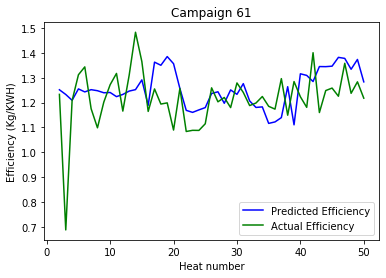

In [97]:
#Plots
camp = [61]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (Kg/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();